# Prueba 2: Cristobal Vasquez 

In [204]:
# Importamos las librerias a utilizar y cargamos los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr 

url = 'athlete_events (1).xlsx'

df = pd.read_excel(url)



In [205]:
# Analizamos la data en busca de datos faltantes:

datosnull = df.isnull().sum()

datosnull[1:15,]

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Note que la columna *Medal* posee la mayor cantidad cantidad de valores *NAN*. Es por esto, que procedemos a sustituir estos valores por el valor más frecuente.

In [206]:
print(df.Medal.value_counts())

medal_frec = "Gold"

df.Medal.fillna(medal_frec, inplace=True)

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [207]:
numvar = ['Age','Height','Weight','Year']

Para las variables numéricas, procedemos a remplazar los *NAN* con la media de los valores asociados a estas

In [208]:
mediaage= df.Age.median()
mediaheight= df.Height.median()
mediaweight= df.Weight.median()
mediayear= df.Year.median()

In [209]:
df.Age.fillna(mediaage, inplace=True)
df.Height.fillna(mediaheight, inplace=True)
df.Weight.fillna(mediaweight, inplace=True)
df.Year.fillna(mediayear, inplace=True)

In [210]:
## PCA

Ahora bien, una vez realizados estos cambios, claramente la variable no puede ser descrita en términos de sus variables numéricas. Sin embargo, podemos describir la variable **Sport** en términos de las varibales numérica ya que es la única variable que puede ser impactada por los datos de las variables numéricas.

In [211]:
# Para escoger el número de componentes principales, 
# analizamos la media y la varianza de cada una de las variables numéricas

x = df.loc[:, numvar].values

datos1 = pd.DataFrame(data = x, columns = numvar)

datos1.head()

print("Cálculo de la Media")
print(datos1.mean())

print(" ")
print("Cálculo de la Varianza")
print(datos1.mean())

Cálculo de la Media
Age       2.550249e+01
Height    1.752637e+02
Weight    1.681937e+10
Year      1.978378e+03
dtype: float64
 
Cálculo de la Varianza
Age       2.550249e+01
Height    1.752637e+02
Weight    1.681937e+10
Year      1.978378e+03
dtype: float64


Note que *Height* y *Año* son las variables con mayor varianza. Es por ello, que precisamos de estandarizar nuestros datos de forma de que esto no afecte nuestro análisis.

In [212]:
# Escogemos la variable a describir

y = df.loc[:,['Sport']].values

# Estandarizamos las variables numéricas

x = StandardScaler().fit_transform(x)

In [213]:
# Aplicamos PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['CP1', 'CP2', 'CP3'])

# Unimos la variable y con el Dataframe obtenido

finalDf = pd.concat([principalDf, df[['Sport']]], axis = 1)

In [214]:
finalDf.head()

,CP1,CP2,CP3,Sport
0,-0.108242,0.686955,-0.030082,Basketball
1,-1.055127,0.483284,-0.013033,Judo
2,0.613646,-1.475417,0.031130,Football
3,2.089623,-2.033589,0.057262,Tug-Of-War
4,-0.137546,0.959057,-0.047118,Speed Skating


In [215]:
pca.explained_variance_ratio_

array([0.28076534, 0.25990179, 0.24999435])

Luego, utilizando solo 3 componentes principales, obtenemos una varianza explicada de aproximadamente el 80% de los datos.

## Regresión Lineal

En los deportistas, una de las principales afecciones a lo largo del tiempo es la edad y el peso. Por eso, podemos ver como evoluciona el peso en función de la edad a través de una regresión lineal.

In [216]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
X =df[['Age']]
X_train = np.array(X)
Y = df['Weight'].values
y_train = np.array(Y)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Pendiente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [7.06820712e+08]
Independent term: 
 -1206321636.6760578
Mean squared error: 12786352026318963717701632.00
Variance score: 0.00


Así, no corresponde realizar una regresión lineal entre estas dos variables ya que su $R^{2}$ es *12786352026318963717701632.00* y su puntaje de varianza es *0*.

## Outliers

Para analizar los outliers, primero veamos los histogramas de las variables numéricas

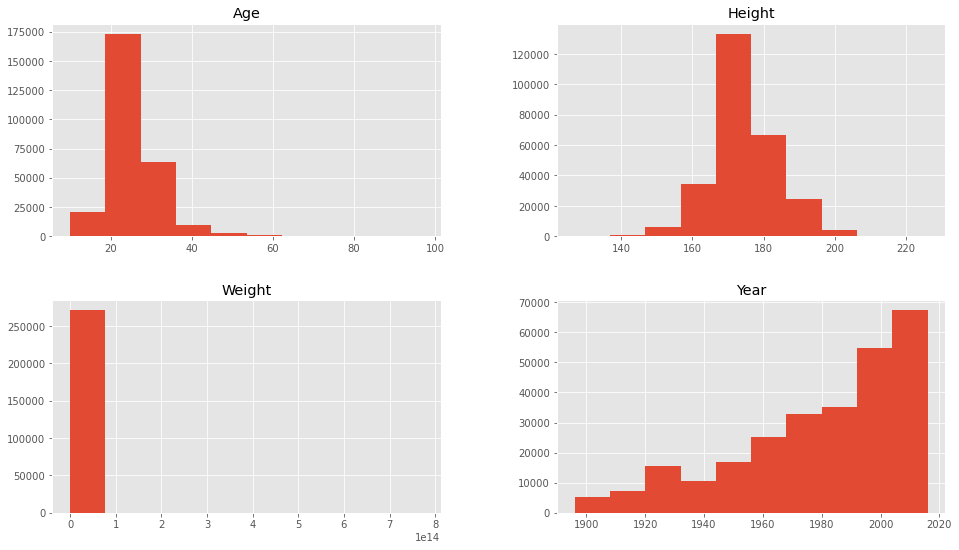

In [217]:
# Visualizamos rápidamente las caraterísticas de entrada
datos1.hist()
plt.show()

Ahora, analicemos la correlación entre la variable *Year* y las demas variables

In [218]:
correlation_matrix = datos1.corr()
correlation_matrix["Year"]

Age      -0.094497
Height    0.039832
Weight    0.001949
Year      1.000000
Name: Year, dtype: float64

Así la mayor relación existente entre *Year* y las demás variables es con la variable *Height*.

Height vs Year


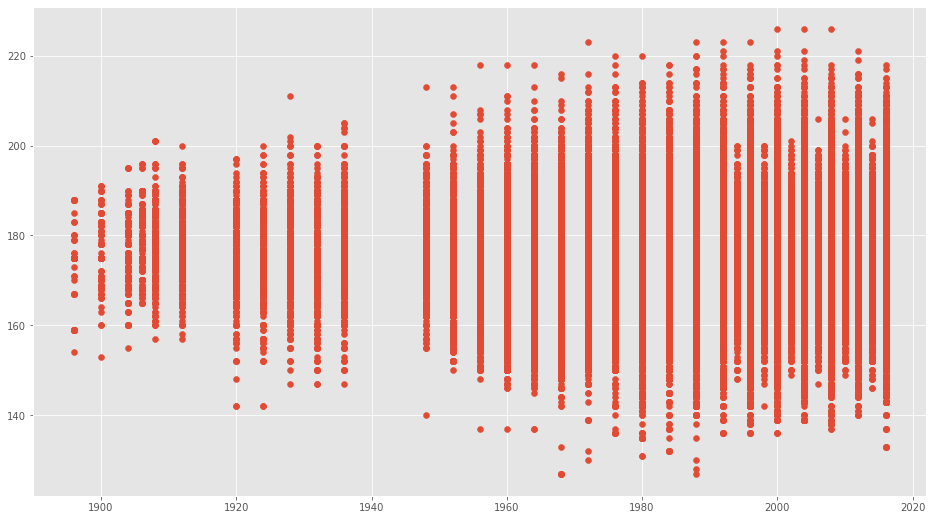

In [219]:
X = datos1[["Height"]]
X = X.values
y = datos1["Year"]
y = y.values

print("Height vs Year")

plt.scatter(y,datos1[["Height"]])



In [220]:
# Aplicamos KNN para k=3

nbrs = NearestNeighbors(n_neighbors = 3)
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

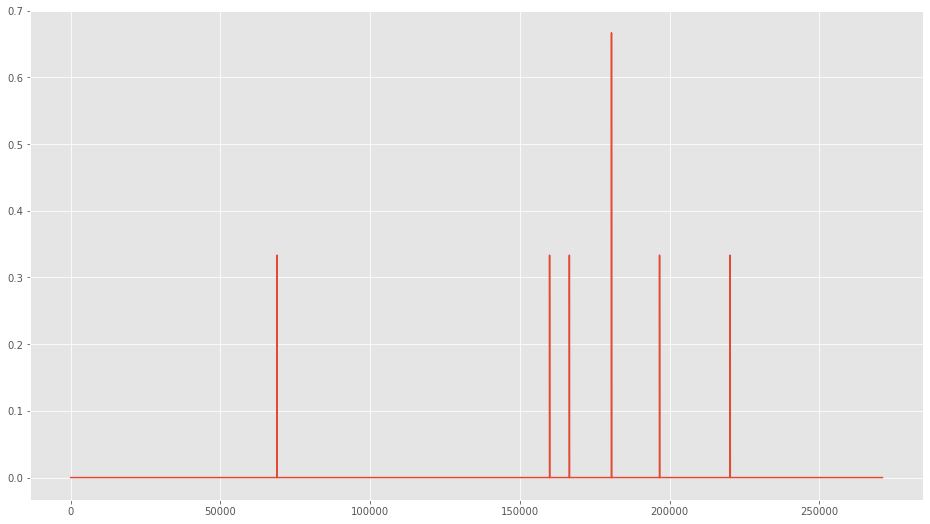

In [221]:
# Distancias e índices de k-vecino de los resultados del modelo
distances, indexes = nbrs.kneighbors(X)
# Grafico de las medias de las k-distancias de cada observación
plt.plot(distances.mean(axis =1))

In [222]:
# Cortemos para 2.5

outlier_index = np.where(distances.mean(axis = 1) > 0.3)
outlier_index

# Visualicemos

outlier_values = df.iloc[outlier_index]
outlier_values

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
68861,35122,Nadia Fezzani,F,24.0,131.0,41.0,Libya,LBA,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Women's 100 metres Freestyle,Gold
68862,35122,Nadia Fezzani,F,24.0,131.0,41.0,Libya,LBA,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Women's 100 metres Butterfly,Gold
159934,80255,Salvador Miranda,M,22.0,130.0,51.0,Nicaragua,NCA,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,Gold
166544,83657,Dmitry Aleksandrovich Musersky,M,23.0,219.0,104.0,Russia,RUS,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Gold
180615,90772,Helman Palije,M,21.0,128.0,74.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,Gold
196667,98731,Peter John Ramos Fuentes,M,19.0,219.0,113.0,Puerto Rico,PUR,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Gold
220270,110638,Boston Simbeye,M,28.0,130.0,67.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Welterweight,Gold


Así, los outliers son medallistas de oro compitiendo en verano. Visuealicemos estas anomalías en el siguiente gráfico

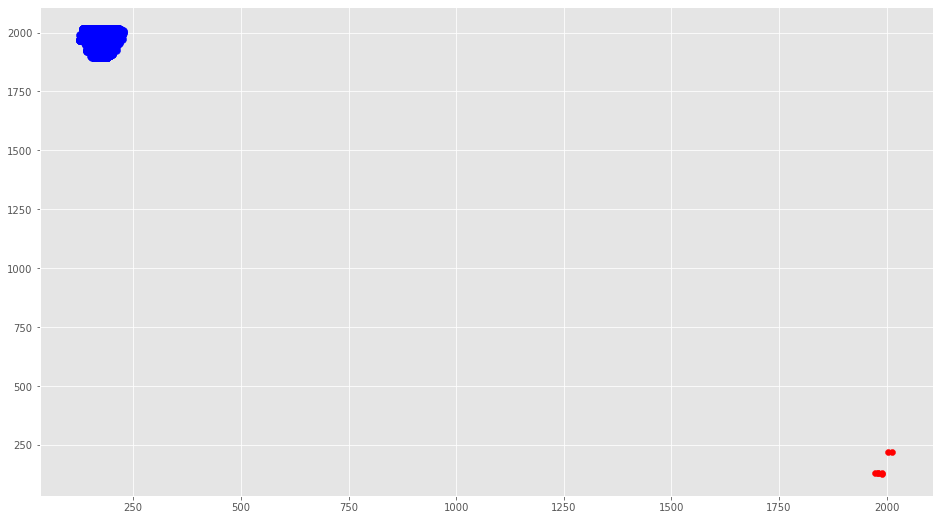

In [223]:
# Plot datos
plt.scatter(X,y, color = "b", s = 65)
# Plot Outlier
plt.scatter(outlier_values["Year"], outlier_values["Height"], color = "r")

## Test de Hipótesis de Pearson


Realizaremos el test de hipótesis entre la variable *Sport* y la variable *Age* ya que es una de las variables categóricoas que se relacionan en demasía.

In [237]:
# Realizamos el conteo de cada uno de los valores asociados a cada variable

X = df.Age.value_counts()

X = np.array(X)

Y = df.Sport.value_counts()

Y = X = np.array(Y)

# Aplicamos el Test de Pearson

stat, p = pearsonr(X, Y)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(Hay relación entre las variables)') 
else: 
    print('Independent(NO hay relación entre las variables)') 

stat=1.000, p=0.000
p value is 0.0
Dependent(Hay relación entre las variables)


In [ ]:
Así, como $p=0,$ entonces hay una probabilidad de que las variables si esten relacionadas.